- **Nama:** Nabila Alawiyah
- **Email:** nabilaalawiyah.25@gmail.com
- **ID Dicoding:** nabila_alawiyah_B1OF

#A. Data Preparation



1. Menggunakan algoritma deep learning di luar dari contoh latihan.

**DONE: menggunakan LSTM**
2. Akurasi pada training set dan testing set di atas 92%.

**DONE: menggunakan LSTM di atas 92%**
3. Dataset memiliki minimal tiga kelas.

**Done: memiliki 3 kelas, yaitu positif, negative, dan neutral**
4. Memiliki jumlah data minimal 10.000 sampel data.

**Done: Memiliki data hasil scrapping sebanyak 25.000 dan memiliki 18.165 setelah dilakukan penghapusan pada missing value**
5. Melakukan 3 percobaan skema pelatihan yang berbeda. Skema ini dapat dibedakan dari variasi algoritma pelatihan, metode ekstraksi fitur, pelabelan dan pembagian data dengan memilih minimal 2 kombinasi.

**Done: memperoleh 6 model percobaan dengan skema yang berbeda**
*   **melakukan pembagian data 80% dan 70% pada train**
*   **Variasi algoritma: SVM, XGBoost, dan LSTM (Machine Learning**
*   **Ekstrasi fitur: Tf-Idf dan tensorflow**



6. Melakukan inference atau testing dalam file .ipynb atau .py yang menghasilkan output berupa kelas kategorikal (contoh: negatif, netral, dan positif).

**Done : Sudah melakukan inference atau testing, dan menghasilkan kelas negatif, positif, dan netral**



## A.1 Instalasi dan import library

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 14.7 MB/s eta 0:00:00


In [ ]:
!pip install sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras

In [ ]:
# Import library untuk pengolahan data dan visualisasi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.options.mode.chained_assignment = None
np.random.seed(0)

# Konfigurasi visualisasi dan warning
sns.set()
warnings.filterwarnings('ignore')

# Import library untuk manipulasi teks, waktu, dan data eksternal
import datetime as datetime
import re
import string
import csv
import requests
from io import StringIO
from collections import Counter

# Import library untuk pemrosesan teks
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Import library untuk Bahasa Indonesia
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Import untuk visualisasi teks
from wordcloud import WordCloud

# Download resource yang dibutuhkan dari NLTK
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")

# Import library untuk pemodelan dan evaluasi
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    auc,
    roc_curve,
    classification_report
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

# Import untuk penanganan data tidak seimbang
from imblearn.over_sampling import SMOTE  # Handling Imbalanced

# Import library tensorflow untuk deep learning
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

# Import csv
import csv

# Download file
from google.colab import files

# Import Algoritma xgboost
from xgboost import XGBClassifier

# Import optuna untuk tuning

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#load data hasil scrapping
file_id = '1HxflUTf2O5rLeQWdF3hvacrxOJDRScO_'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data_scrapping = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data_scrapping.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,744c3a13-91f4-471a-8f5f-27b458b9cc81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya lagi nonton video pembelajaran nih, diman...",3,0,6.94.1,2025-04-05 11:22:46,Maaf ya bikin Rhamdan nggak nyaman. Untuk bant...,2025-04-06 03:23:00,6.94.1
1,29e46830-aa9f-41d5-91c1-4c79dab3af5b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi Ruangguru seringkali lemot padahal ja...,3,0,6.94.1,2025-03-28 05:06:35,"Wah, lag gimana nih, Shinta? Maaf ya menggangg...",2025-03-28 06:57:11,6.94.1
2,6aeb166d-fec8-49a1-bd3b-1da8ba591a95,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Overall semuanya tampak bagus, tapi tolong dev...",5,132,6.94.1,2025-03-04 08:54:12,Terima kasih ya atas saran dan masukannya. Sar...,2025-03-04 09:07:18,6.94.1
3,89767630-23ef-491f-b4fa-7db002ac85c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ruangguru benar² menjadi ruang yang menyenangk...,5,137,6.94.0,2025-02-17 08:50:39,Makasih ya Imamm buat bintang 5-nya. Seneng de...,2025-02-17 09:48:34,6.94.0
4,5af52b52-08d3-4efc-bd1e-d15a8c21c456,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,fitur adapto menambah semangat belajar karena ...,5,0,6.94.1,2025-04-06 03:05:32,Thank you ya Cloudy buat feedback yang diberik...,2025-04-06 04:19:40,6.94.1


In [ ]:
data_scrapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              25000 non-null  object
 1   userName              24999 non-null  object
 2   userImage             25000 non-null  object
 3   content               25000 non-null  object
 4   score                 25000 non-null  int64 
 5   thumbsUpCount         25000 non-null  int64 
 6   reviewCreatedVersion  18236 non-null  object
 7   at                    25000 non-null  object
 8   replyContent          24790 non-null  object
 9   repliedAt             24790 non-null  object
 10  appVersion            18236 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.1+ MB


In [ ]:
# Menghitung jumlah baris dan kolom
data_scrapping.shape

(25000, 11)

In [ ]:
#load data hasil cleaning dari dataa_scrapping
file_id = '1bGzcV2IzOJMEUlg6JSiO9_mMSK_pzBwk'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data_model = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data_model.head()

,content,score
0,"saya lagi nonton video pembelajaran nih, diman...",3
1,Aplikasi Ruangguru seringkali lemot padahal ja...,3
2,"Overall semuanya tampak bagus, tapi tolong dev...",5
3,ruangguru benar² menjadi ruang yang menyenangk...,5
4,fitur adapto menambah semangat belajar karena ...,5


In [ ]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18165 entries, 0 to 18164
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  18165 non-null  object
 1   score    18165 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 284.0+ KB


In [ ]:
# Menghitung jumlah baris dan kolom dalam DataFrame
data_model.shape

(18165, 2)

#B. Text Preprocessing

## B.1 Cleaning and Tokenizing

In [ ]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
              "tpi":"tapi","tp":"tapi","ktolong":"ka tolong","g":"tidak","anjiiiing":"umpat","knp":"kenapa","tibatiba":"tiba-tiba","ad":"ada",
              "tbtb":"tiba-tiba","yt":"youtube","ig":"instagram","gk":"tidak","yg":"yang","moga":"semoga","pake":"pakai","ngirim":"kirim",
              "muas":"puas","sdh":"sudah","lg":"lagi","sya":"saya","klo":"kalau","knpa":"kenapa","tdk":"tidak","sampe":"sampai","kayak":"seperti",
              "cuman":"hanya","prose":"proses","ny":"","jd":"jadi","dgn":"dengan","jg":"juga","tf":"transfer","sampe":"sampai","ngirim":"kirim",
              "bagu":"bagus","skrg":"sekarang","nunggu":"tunggu","udah":"sudah","uda":"sudah","pk":"pakai","@": "di", "abis": "habis", "wtb": "beli",
              "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia",
              "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah",
              "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku",
              "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa",
              "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik",
              "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
              "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur",
              "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar",
              "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana",
              "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar",
              "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",
              "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur",
              "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi",
              "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja",
              "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci",
              "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor",
              "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan",
              "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan",
              "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian",
              "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile",
              "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan",
              "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi",
              "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda",
              "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo",
              "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh",
              "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi",
              "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus",
              "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah",
              "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba",
              "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras",
              "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual",
              "tioghoa": "tionghoa", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def normalisasi_slang(teks):
    hasil = []
    for kata in teks.split():
        kata_baru = slangwords.get(kata.lower(), kata)
        hasil.append(kata_baru)
    return ' '.join(hasil)

In [ ]:
# Menyusun daftar stopwords (kata-kata umum yang akan diabaikan dalam analisis)
listStopwords = set(stopwords.words('indonesian') + stopwords.words('english'))
listStopwords.update([
    'iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya',
    'gaa', 'loh', 'kah', 'woi', 'woii', 'woy', 'anjay', 'gk', 'g'
])

# Fungsi untuk membersihkan teks dari unsur-unsur yang tidak relevan
def cleaningText(text):
    text = str(text).lower()  # Konversi ke huruf kecil
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)         # Hapus mention pengguna
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)         # Hapus hashtag
    text = re.sub(r'http\S+', '', text)                # Hapus tautan
    text = re.sub(r'\b(?:\d{1,3}[-.\s]?)?(?:\d{3}[-.\s]?)?\d{4,}\b', '', text)  # Hapus nomor telepon
    text = re.sub(r'\d+', '', text)                    # Hapus angka biasa
    text = re.sub(rf"[{re.escape(string.punctuation)}]", '', text)  # Hilangkan tanda baca
    text = re.sub(r'\s+', ' ', text)                   # Bersihkan spasi ganda
    return text.strip()

# Fungsi untuk memecah teks menjadi kata-kata dan membuang stopwords
def tokenizingText(text):
    tokens = word_tokenize(text)  # Tokenisasi teks
    tokens = [word for word in tokens if word not in listStopwords]  # Filter stopwords
    return tokens

# Fungsi untuk mengubah kata menjadi bentuk dasar (stemming)
def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()  # Pisahkan teks menjadi kata-kata
    stemmed_words = [stemmer.stem(word) for word in words]  # Stem setiap kata
    return ' '.join(stemmed_words)  # Gabungkan kembali menjadi satu kalimat

# Fungsi untuk mengubah daftar kata kembali menjadi satu kalimat
def toSentence(list_words):
    return ' '.join(word for word in list_words)

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
data_model['text_clean'] = data_model['content'].apply(cleaningText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
data_model['text_slangwords'] = data_model['text_clean'].apply(normalisasi_slang)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
data_model['text_tokenizingText1'] = data_model['text_slangwords'].apply(tokenizingText)
data_model['text_tokenizingText'] = data_model['text_tokenizingText1'].apply(' '.join) # join word in list
hasil = " ".join(data_model['text_tokenizingText']) # join list in one text


In [ ]:
data_model.head()

,content,score,text_clean,text_slangwords,text_tokenizingText1,text_tokenizingText
0,"saya lagi nonton video pembelajaran nih, diman...",3,saya lagi nonton video pembelajaran nih dimana...,saya lagi nonton video pembelajaran ini dimana...,"[nonton, video, pembelajaran, dimana, video, p...",nonton video pembelajaran dimana video pembela...
1,Aplikasi Ruangguru seringkali lemot padahal ja...,3,aplikasi ruangguru seringkali lemot padahal ja...,aplikasi ruangguru seringkali lambat padahal j...,"[aplikasi, ruangguru, seringkali, lambat, jari...",aplikasi ruangguru seringkali lambat jaringan ...
2,"Overall semuanya tampak bagus, tapi tolong dev...",5,overall semuanya tampak bagus tapi tolong deve...,overall semuanya tampak bagus tapi tolong deve...,"[overall, bagus, tolong, developer, tambahkan,...",overall bagus tolong developer tambahkan mode ...
3,ruangguru benar² menjadi ruang yang menyenangk...,5,ruangguru benar² menjadi ruang yang menyenangk...,ruangguru benar² menjadi ruang yang menyenangk...,"[ruangguru, benar², ruang, menyenangkan, belaj...",ruangguru benar² ruang menyenangkan belajar ma...
4,fitur adapto menambah semangat belajar karena ...,5,fitur adapto menambah semangat belajar karena ...,fitur adapto menambah semangat belajar karena ...,"[fitur, adapto, menambah, semangat, belajar, p...",fitur adapto menambah semangat belajar pengala...


## B.2 Stemming

In [ ]:
# create stemmer and process stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
from tqdm import tqdm

#menyimpan hasil stemming di kolom stemmed
stem_cache = {}

def cached_stem(word):
    if word not in stem_cache:
        stem_cache[word] = stemmer.stem(word)
    return stem_cache[word]

tqdm.pandas()

data_model["stemmed"] = data_model["text_tokenizingText1"].progress_apply(
    lambda words: [cached_stem(word) for word in words]
)


data_model.head()

100%|██████████| 18165/18165 [39:31<00:00,  7.66it/s]


,content,score,text_clean,text_slangwords,text_tokenizingText1,text_tokenizingText,stemmed
0,"saya lagi nonton video pembelajaran nih, diman...",3,saya lagi nonton video pembelajaran nih dimana...,saya lagi nonton video pembelajaran ini dimana...,"[nonton, video, pembelajaran, dimana, video, p...",nonton video pembelajaran dimana video pembela...,"[nonton, video, ajar, mana, video, pembelajara..."
1,Aplikasi Ruangguru seringkali lemot padahal ja...,3,aplikasi ruangguru seringkali lemot padahal ja...,aplikasi ruangguru seringkali lambat padahal j...,"[aplikasi, ruangguru, seringkali, lambat, jari...",aplikasi ruangguru seringkali lambat jaringan ...,"[aplikasi, ruangguru, seringkali, lambat, jari..."
2,"Overall semuanya tampak bagus, tapi tolong dev...",5,overall semuanya tampak bagus tapi tolong deve...,overall semuanya tampak bagus tapi tolong deve...,"[overall, bagus, tolong, developer, tambahkan,...",overall bagus tolong developer tambahkan mode ...,"[overall, bagus, tolong, developer, tambah, mo..."
3,ruangguru benar² menjadi ruang yang menyenangk...,5,ruangguru benar² menjadi ruang yang menyenangk...,ruangguru benar² menjadi ruang yang menyenangk...,"[ruangguru, benar², ruang, menyenangkan, belaj...",ruangguru benar² ruang menyenangkan belajar ma...,"[ruangguru, benar, ruang, senang, ajar, materi..."
4,fitur adapto menambah semangat belajar karena ...,5,fitur adapto menambah semangat belajar karena ...,fitur adapto menambah semangat belajar karena ...,"[fitur, adapto, menambah, semangat, belajar, p...",fitur adapto menambah semangat belajar pengala...,"[fitur, adapto, tambah, semangat, ajar, alam, ..."


In [ ]:
#kata yang sudah di stemming disatukan menjadi satu kalimat dan mengubah tipe objt ke str pada text akhir
data_model["text_akhir"] = data_model["stemmed"].apply(lambda x: " ".join([item for item in x]))
data_model['text_akhir'] = data_model['text_akhir'].astype('str')
data_model['text_akhir']= data_model['text_akhir'].astype(pd.StringDtype())
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18165 entries, 0 to 18164
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               18165 non-null  object
 1   score                 18165 non-null  int64 
 2   text_clean            18165 non-null  object
 3   text_slangwords       18165 non-null  object
 4   text_tokenizingText1  18165 non-null  object
 5   text_tokenizingText   18165 non-null  object
 6   stemmed               18165 non-null  object
 7   text_akhir            18165 non-null  string
dtypes: int64(1), object(6), string(1)
memory usage: 1.1+ MB


## B.3 Labeling Sentimen

In [ ]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
# Fungsi untuk menganalisis sentimen teks menggunakan pendekatan leksikon Bahasa Indonesia
def sentiment_analysis_lexicon_indonesia(text):
    score = 0  # Awal nilai sentimen diset ke nol

    # Menambahkan nilai jika kata terdapat dalam leksikon positif
    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]

    # Mengurangi nilai jika kata terdapat dalam leksikon negatif
    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]

    # Inisialisasi variabel polaritas
    if (score > 0):
        polarity = 'positive'
        sentimen = 1
        # Jika skor sentimen lebih besar 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        sentimen = -1
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'# polaritas netral nilai sama dengan 0
        sentimen = 0
    return score, polarity, sentimen # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = data_model['stemmed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data_model['polarity_score'] = results[0]
data_model['polarity'] = results[1]
data_model['sentiment'] = results[2]
print(data_model['polarity'].value_counts())

polarity
positive    8680
negative    8460
neutral     1025
Name: count, dtype: int64


In [ ]:
data_model.head()

,content,score,text_clean,text_slangwords,text_tokenizingText1,text_tokenizingText,stemmed,text_akhir,polarity_score,polarity,sentiment
0,"saya lagi nonton video pembelajaran nih, diman...",3,saya lagi nonton video pembelajaran nih dimana...,saya lagi nonton video pembelajaran ini dimana...,"[nonton, video, pembelajaran, dimana, video, p...",nonton video pembelajaran dimana video pembela...,"[nonton, video, ajar, mana, video, pembelajara...",nonton video ajar mana video pembelajarannnya ...,-9,negative,-1
1,Aplikasi Ruangguru seringkali lemot padahal ja...,3,aplikasi ruangguru seringkali lemot padahal ja...,aplikasi ruangguru seringkali lambat padahal j...,"[aplikasi, ruangguru, seringkali, lambat, jari...",aplikasi ruangguru seringkali lambat jaringan ...,"[aplikasi, ruangguru, seringkali, lambat, jari...",aplikasi ruangguru seringkali lambat jaring ra...,-4,negative,-1
2,"Overall semuanya tampak bagus, tapi tolong dev...",5,overall semuanya tampak bagus tapi tolong deve...,overall semuanya tampak bagus tapi tolong deve...,"[overall, bagus, tolong, developer, tambahkan,...",overall bagus tolong developer tambahkan mode ...,"[overall, bagus, tolong, developer, tambah, mo...",overall bagus tolong developer tambah mode gel...,-15,negative,-1
3,ruangguru benar² menjadi ruang yang menyenangk...,5,ruangguru benar² menjadi ruang yang menyenangk...,ruangguru benar² menjadi ruang yang menyenangk...,"[ruangguru, benar², ruang, menyenangkan, belaj...",ruangguru benar² ruang menyenangkan belajar ma...,"[ruangguru, benar, ruang, senang, ajar, materi...",ruangguru benar ruang senang ajar materi lengk...,-1,negative,-1
4,fitur adapto menambah semangat belajar karena ...,5,fitur adapto menambah semangat belajar karena ...,fitur adapto menambah semangat belajar karena ...,"[fitur, adapto, menambah, semangat, belajar, p...",fitur adapto menambah semangat belajar pengala...,"[fitur, adapto, tambah, semangat, ajar, alam, ...",fitur adapto tambah semangat ajar alam ajar vi...,7,positive,1


In [ ]:
data_model.columns

Index(['content', 'score', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText', 'stemmed', 'text_akhir',
       'polarity_score', 'polarity', 'sentiment'],
      dtype='object')

In [ ]:
#menghapus yang tidak difgunakan dalam pemodelan
data_fix = data_model.drop(['content', 'score', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText'], axis =1)

In [ ]:
data_fix.head()

,stemmed,text_akhir,polarity_score,polarity,sentiment
0,"[nonton, video, ajar, mana, video, pembelajara...",nonton video ajar mana video pembelajarannnya ...,-9,negative,-1
1,"[aplikasi, ruangguru, seringkali, lambat, jari...",aplikasi ruangguru seringkali lambat jaring ra...,-4,negative,-1
2,"[overall, bagus, tolong, developer, tambah, mo...",overall bagus tolong developer tambah mode gel...,-15,negative,-1
3,"[ruangguru, benar, ruang, senang, ajar, materi...",ruangguru benar ruang senang ajar materi lengk...,-1,negative,-1
4,"[fitur, adapto, tambah, semangat, ajar, alam, ...",fitur adapto tambah semangat ajar alam ajar vi...,7,positive,1


In [ ]:
data_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18165 entries, 0 to 18164
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   stemmed         18165 non-null  object
 1   text_akhir      18165 non-null  string
 2   polarity_score  18165 non-null  int64 
 3   polarity        18165 non-null  object
 4   sentiment       18165 non-null  int64 
dtypes: int64(2), object(2), string(1)
memory usage: 709.7+ KB


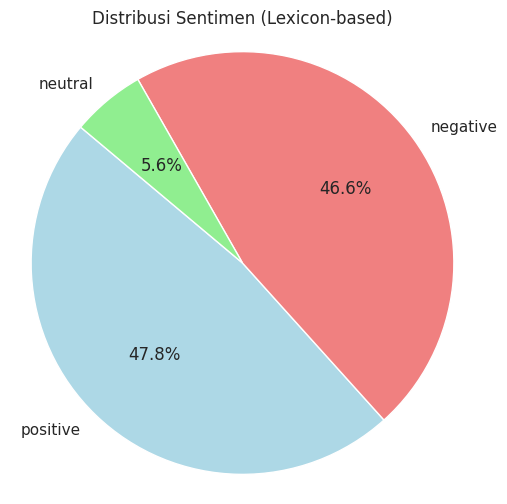

In [ ]:
# Hitung jumlah masing-masing sentimen
polarity_counts = data_model['polarity'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    polarity_counts,
    labels=polarity_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightblue',  'lightcoral', 'lightgreen']
)
plt.title('Distribusi Sentimen (Lexicon-based)')
plt.axis('equal')  # Membuat pie menjadi lingkaran sempurna
plt.show()

## B.4 Visualisasi

### B.4.1 Wordcloud and distribusi word Positive

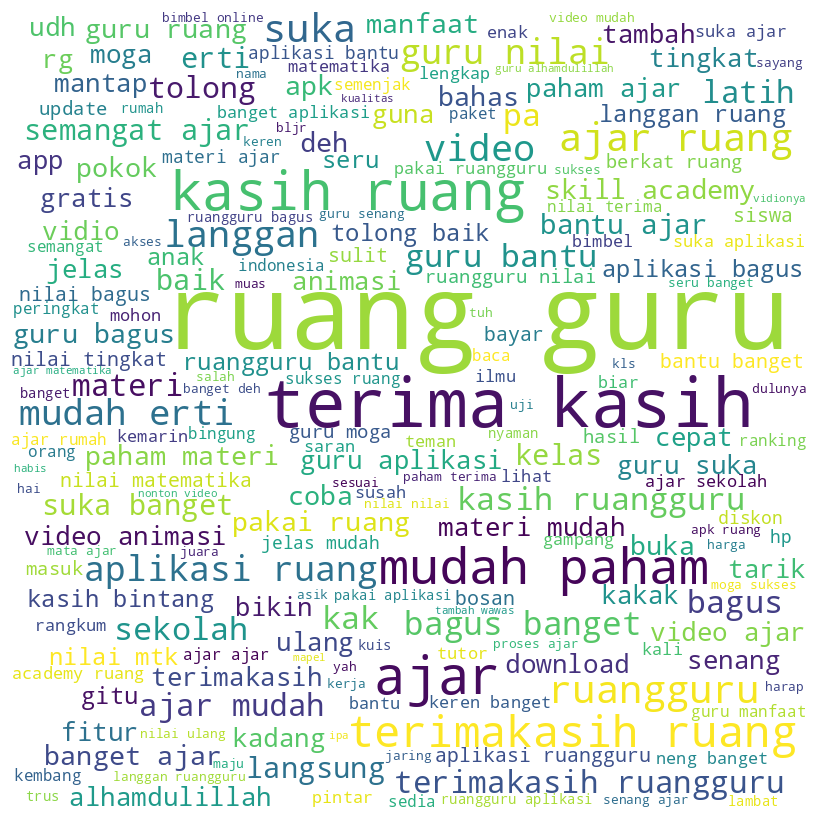

In [ ]:
# Gabungkan semua teks dengan polaritas positif menjadi satu string
teks_positif = " ".join(data_fix[data_fix['sentiment'] == 1]['text_akhir'])

# Membuat objek WordCloud dari teks positif tanpa rotasi (semua horizontal)
wordcloud_positif = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_positif)

# Menampilkan gambar WordCloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_positif)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

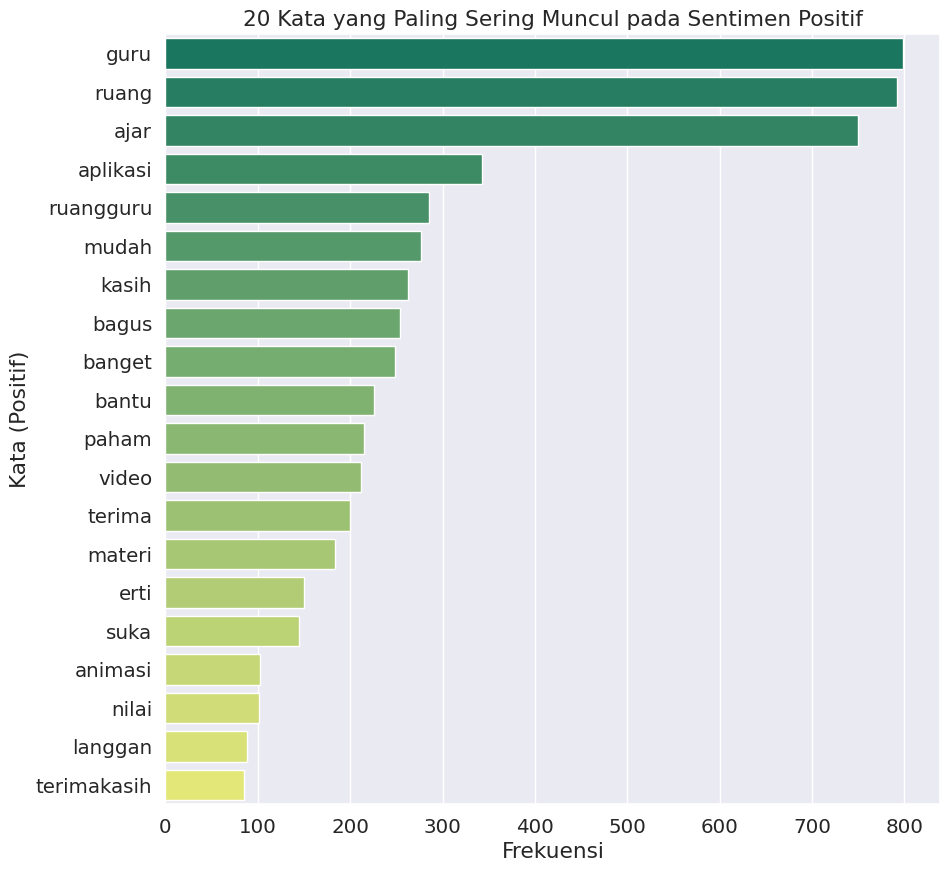

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix[data_fix['polarity_score'] == 1]['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen Positif")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Positif)")
plt.show()

**Insight: **

- Kata yang paling sering muncul merupakan kata penyusun dari nama aplikasinya, yaitu ruang guru
- Dari 10 kata yang paling sering muncul juga terdapat beberapa kata yang menunjukkan bahwa pengguna sangat terbantu dengan adanya aplikasi ruang guru. Hal ini ditandai dengan adanya kata terima, kasih, mudah, banget, dan paham

### B.4.2 Wordcloud and distribusi word negative

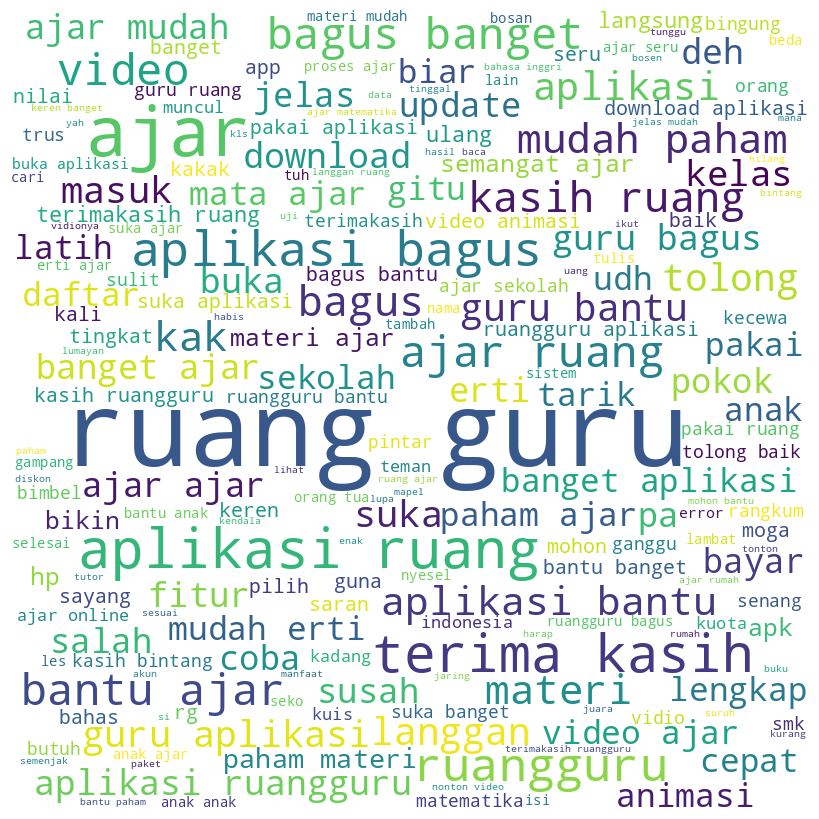

In [ ]:
# Gabungkan semua teks dengan polaritas negatif menjadi satu string
teks_negatif = " ".join(data_fix[data_fix['sentiment'] == -1]['text_akhir'])

# Membuat objek WordCloud dari teks negatif tanpa rotasi (semua horizontal)
wordcloud_negatif = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_negatif)

# Menampilkan gambar WordCloud untuk sentimen negatif
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_negatif)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


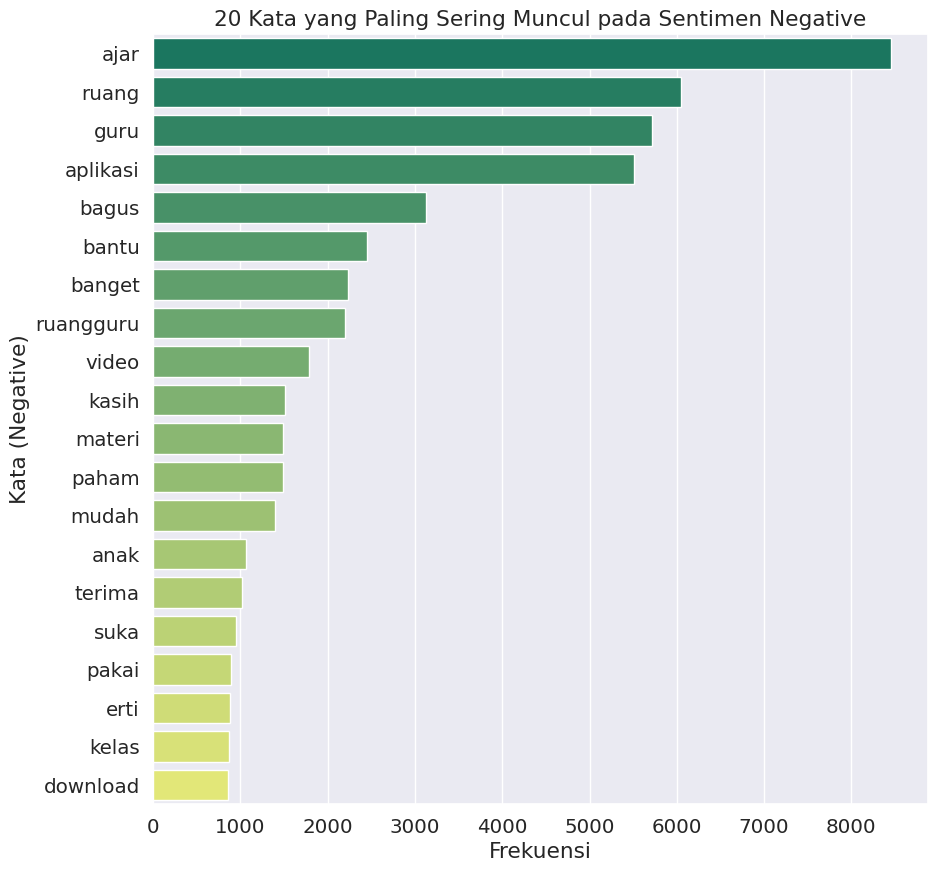

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix[data_fix['sentiment'] == -1]['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen Negative")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Negative)")
plt.show()

**Insight:**
- Kata ajar, ruang, guru, dan aplikasi mendominasi pada ulasan negative


### B.4.3 Wordcloud and distribusi word Neutral

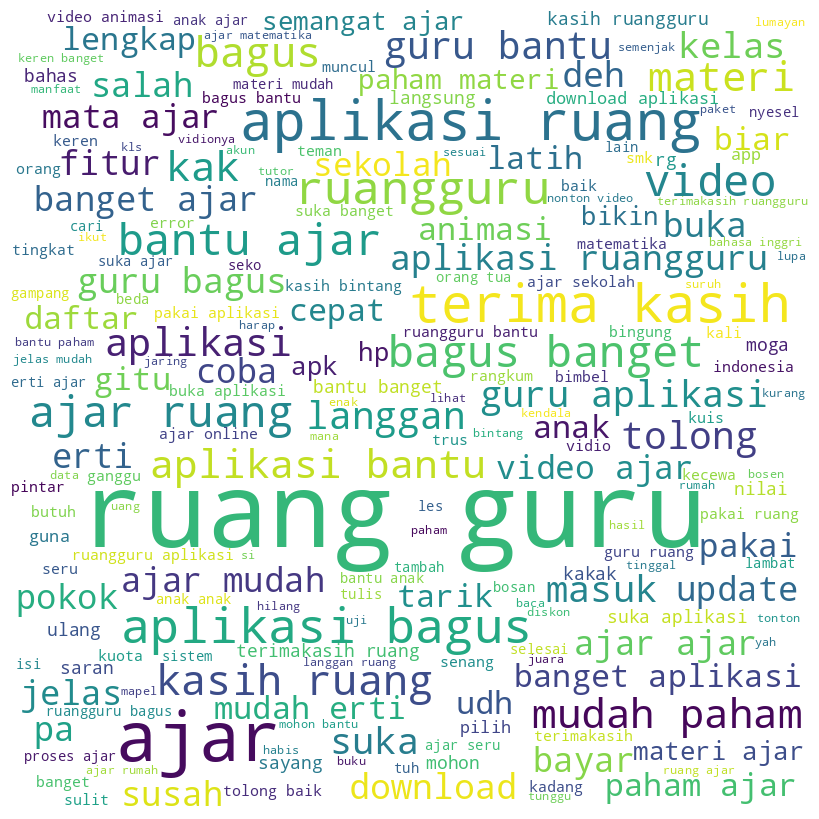

In [ ]:
# Gabungkan semua teks dengan polaritas negatif menjadi satu string
teks_netral = " ".join(data_fix[data_fix['sentiment'] == 0]['text_akhir'])

# Membuat objek WordCloud dari teks negatif tanpa rotasi (semua horizontal)
wordcloud_netral = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_negatif)

# Menampilkan gambar WordCloud untuk sentimen negatif
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_netral)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


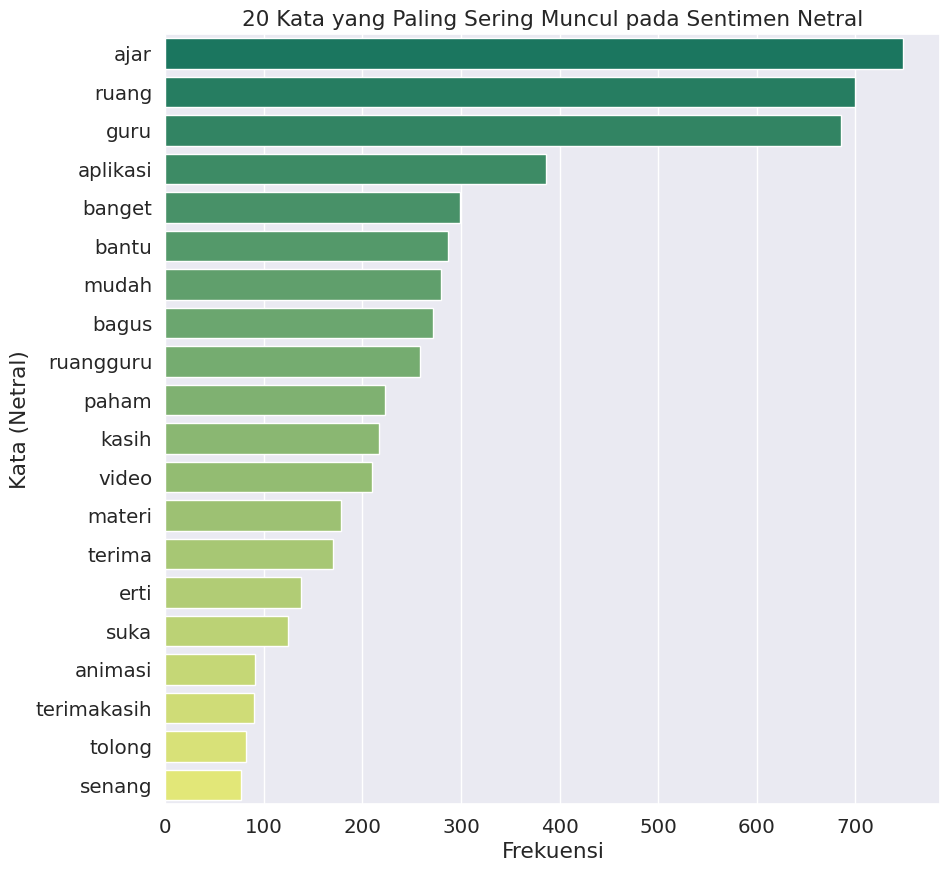

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix[data_fix['sentiment'] == 0]['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen Netral")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Netral)")
plt.show()

**Insight:**
- Kata ajar, ruang, guru, dan aplikasi mendominasi pada ulasan netral

### B.4.4 Wordcloud and distribusi word positive, neutral, and negative

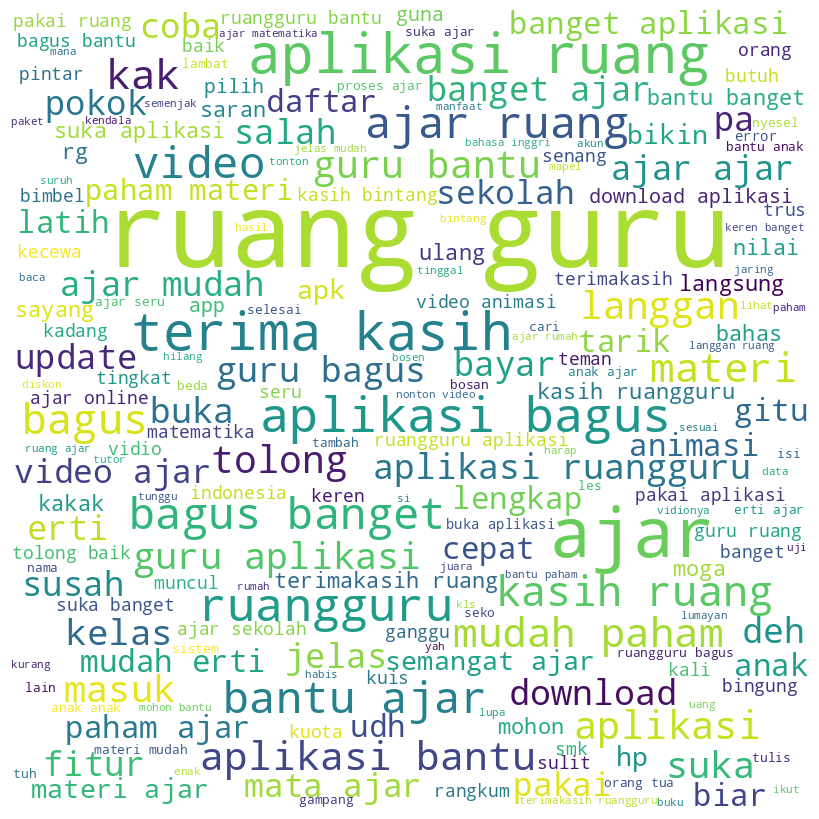

In [ ]:
# Gabungkan semua teks dengan polaritas general menjadi satu string
teks_general = " ".join(data_fix['text_akhir'])

# Membuat objek WordCloud dari teks negatif tanpa rotasi (semua horizontal)
wordcloud_general = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10,
    prefer_horizontal=1.0  # Semua kata horizontal
).generate(teks_negatif)

# Menampilkan gambar WordCloud untuk sentimen negatif
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_general)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


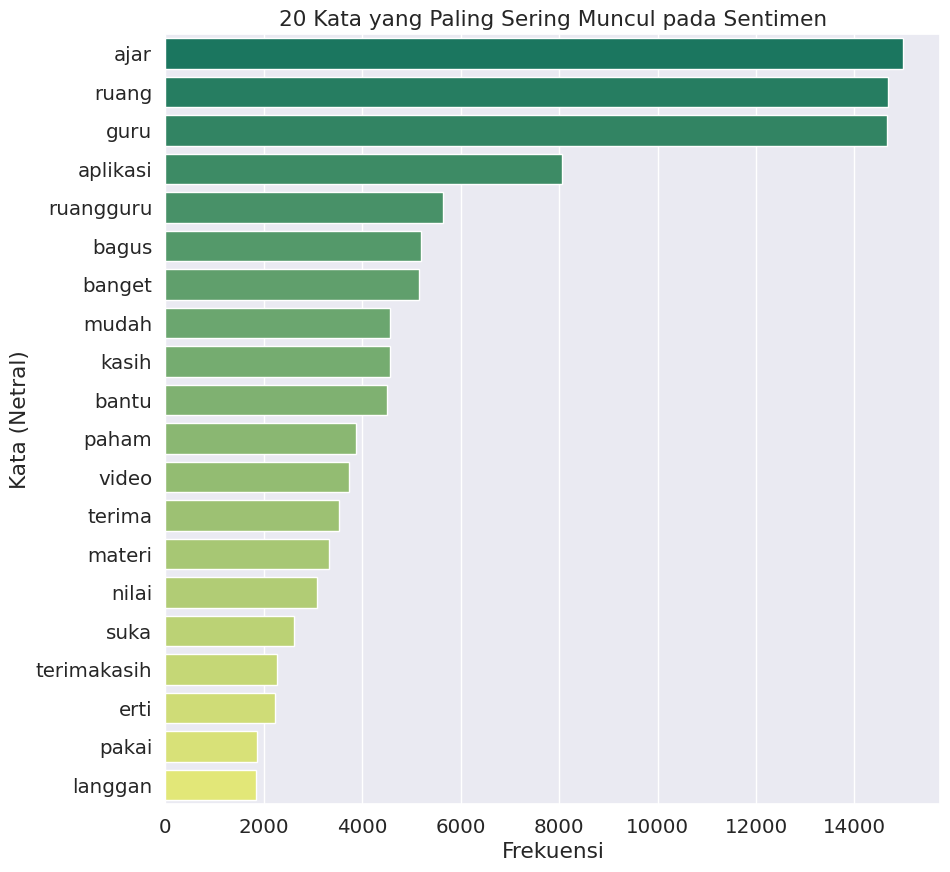

In [ ]:
# Setelan visualisasi dan nonaktifkan warning
sns.set()
warnings.filterwarnings('ignore')

# Kumpulkan semua kata dari teks yang memiliki sentimen positif
semua_kata = []
for kalimat in data_fix['text_akhir'].to_list(): # Replace 'sentiment' with 'polarity_score' and  data_fix['sentiment'] == 1 with data_fix['polarity_score'] > 0
    for kata in kalimat.split():
        semua_kata.append(kata)

# Hitung 25 kata yang paling sering muncul
df1 = pd.DataFrame(Counter(semua_kata).most_common(20), columns=['Kata', 'Frekuensi'])

# Atur tampilan plot
sns.set_context('notebook', font_scale=1.3)
plt.figure(figsize=(10, 10))

# Buat diagram batang horizontal menggunakan seaborn
sns.barplot(y=df1['Kata'], x=df1['Frekuensi'], palette='summer')

# Tambahkan judul dan label sumbu
plt.title("20 Kata yang Paling Sering Muncul pada Sentimen")
plt.xlabel("Frekuensi")
plt.ylabel("Kata (Netral)")
plt.show()

**Insight:**
- Kata ajar, ruang, guru, aplikasi, dan ruangguru mendominasi pada ulasan

Untuk memudahkan eksekusi tanpa harus melakukan stemming beruang kali, saya menyimpan data hasil stemming ke dalam csv. Setelah berhasil download file, program di bawah akan saya jadikan komentar dan langsung runing ke bagian pemodelan.

In [ ]:
# Menyimpan data_fix to csv
data_fix.to_csv('ulasan_sentimen.csv', index=False)
files.download('ulasan_sentimen.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# C. Pemodelan

In [ ]:
#load data hasil scrapping
file_id = '1x9qse9supDtKK2xgoJI7IVAVcG1H6F_I'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
data_fix = pd.read_csv(download_url)

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data_fix

,stemmed,text_akhir,polarity_score,polarity,sentiment
0,"['nonton', 'video', 'ajar', 'mana', 'video', '...",nonton video ajar mana video pembelajarannnya ...,-9,negative,-1
1,"['aplikasi', 'ruangguru', 'seringkali', 'lamba...",aplikasi ruangguru seringkali lambat jaring ra...,-4,negative,-1
2,"['overall', 'bagus', 'tolong', 'developer', 't...",overall bagus tolong developer tambah mode gel...,-15,negative,-1
3,"['ruangguru', 'benar', 'ruang', 'senang', 'aja...",ruangguru benar ruang senang ajar materi lengk...,-1,negative,-1
4,"['fitur', 'adapto', 'tambah', 'semangat', 'aja...",fitur adapto tambah semangat ajar alam ajar vi...,7,positive,1
...,...,...,...,...,...
18160,"['ruang', 'guru', 'mudah', 'ajar', 'ajar', 'sa...",ruang guru mudah ajar ajar sangatt bosan,-1,negative,-1
18161,"['alhamdulilah', 'duku', 'mtk', 'jelek', 'bang...",alhamdulilah duku mtk jelek banget pakai ruang...,10,positive,1
18162,"['bagus', 'banget', 'aplikasi', 'ruang', 'guru...",bagus banget aplikasi ruang guru semangat ajar,-4,negative,-1
18163,"['ruang', 'guru', 'keren', 'banget', 'ruang', ...",ruang guru keren banget ruang guru ajar pintar,-1,negative,-1


In [ ]:
# Pengaturan tampilan
sns.set()
warnings.filterwarnings('ignore')

In [ ]:
# membuat dataframe untuk menyimpan hasil evaluasi
stem_model_eval_tts_train = pd.DataFrame(columns=['Accuracy'])
stem_model_eval_tts_test = pd.DataFrame(columns=['Accuracy'])

## C.1 Ekstrasi Fitur Tfidf dan Handling Imbalanced data

In [ ]:
# Pisahkan data menjadi fitur dan label (sentimen)
X = data_fix['text_akhir']
y = data_fix['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Menampilkan hasil ekstrasi fitur
features_df.head()

,academy,ajar,akses,akun,alhamdulillah,anak,animasi,apk,aplikasi,app,...,tutor,uang,udh,uji,ulang,update,video,vidio,vidionya,yah
0,0.0,0.083575,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.583080,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.356672,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.417778,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.408330,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.236371,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.412274,0.0,0.0,0.0


In [ ]:
# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

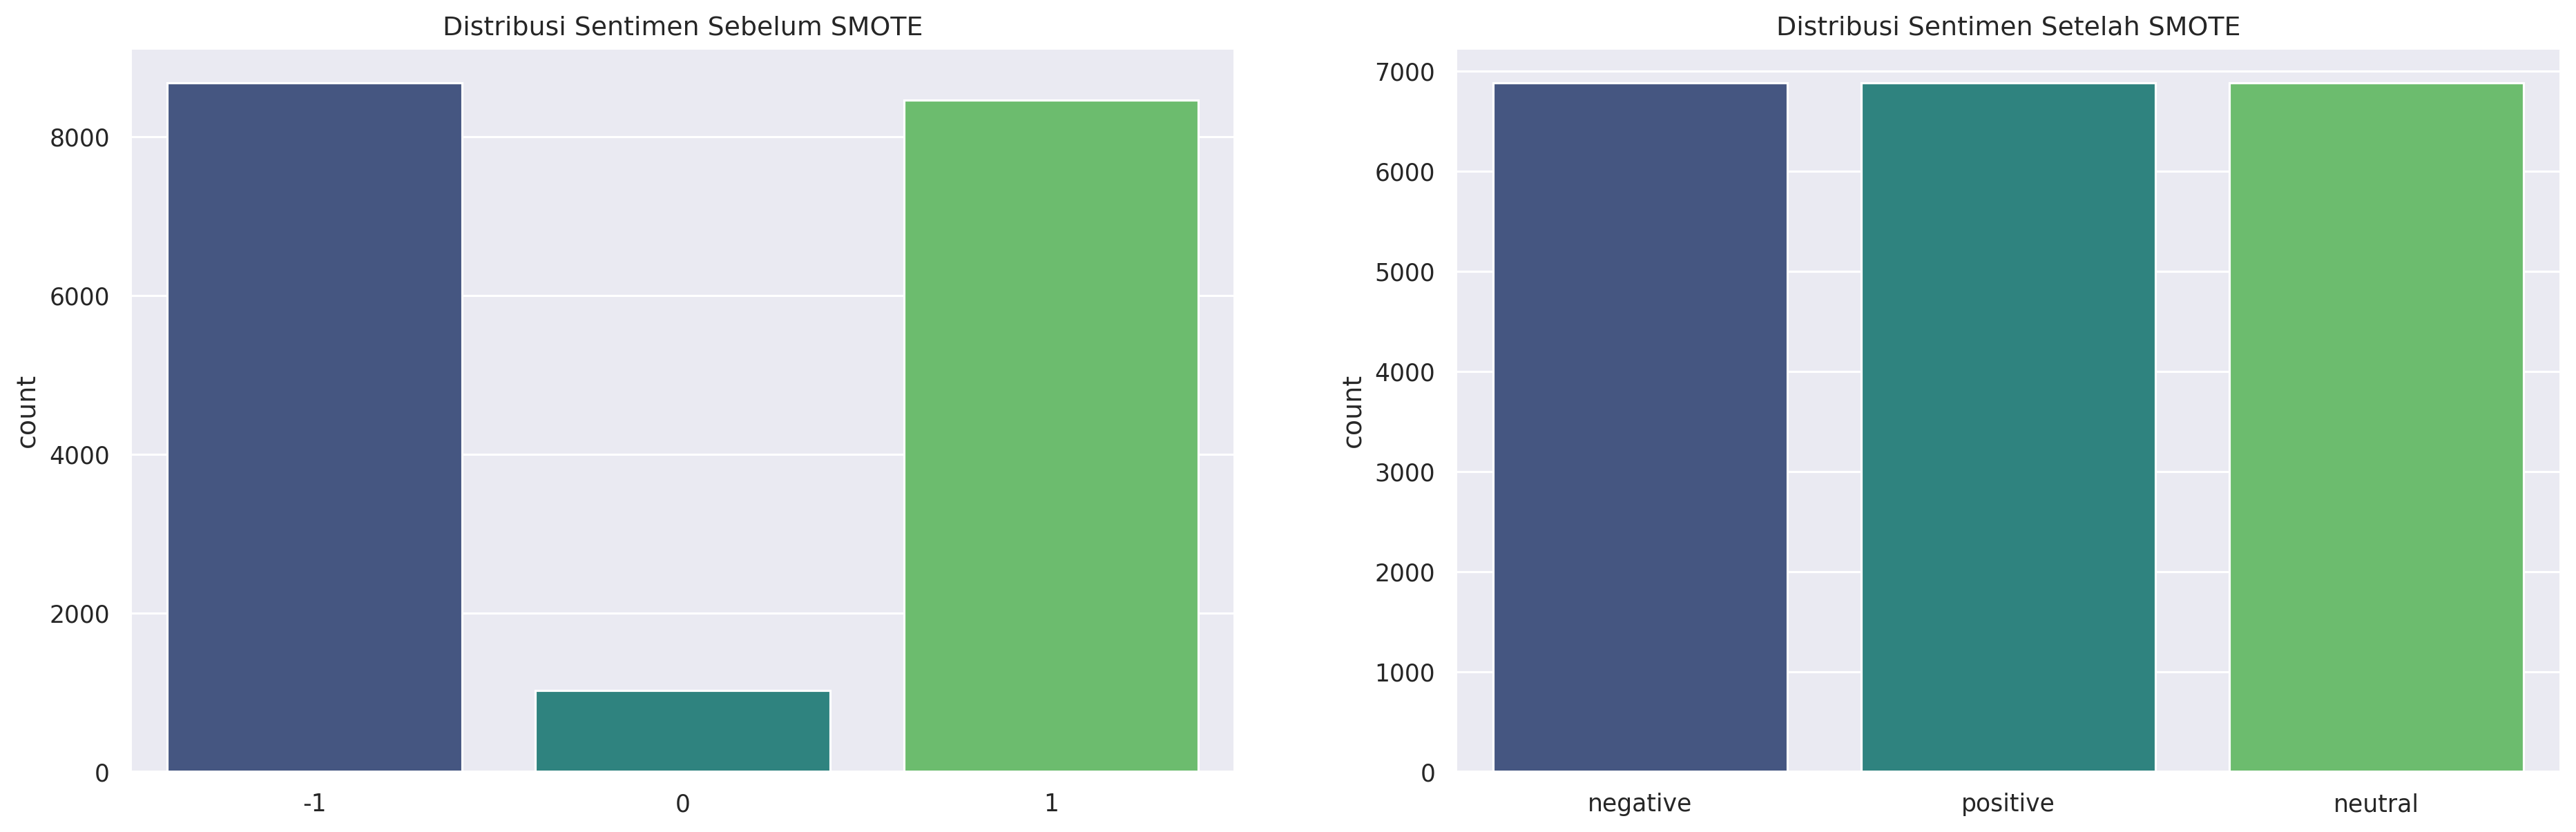

In [ ]:
# Menentukan warna dan ukuran untuk visualisasi (jika digunakan)
sizes = [747, 4825]

# Membuat visualisasi distribusi data secara berdampingan
plt.figure(figsize=(20, 6), dpi=227)

# Plot distribusi data sebelum diterapkan SMOTE
plt.subplot(1, 2, 1)
plt.title("Distribusi Sentimen Sebelum SMOTE")
sns.barplot(
    x=data_fix['sentiment'].unique(),
    y=data_fix['sentiment'].value_counts(),
    palette='viridis'
)

# Plot distribusi data setelah diterapkan SMOTE
plt.subplot(1, 2, 2)
plt.title("Distribusi Sentimen Setelah SMOTE")
sns.barplot(
    x=y_train_sm.unique(),
    y=y_train_sm.value_counts(),
    palette='viridis'
)

# Tampilkan hasil visualisasi
plt.show()

**Insight:**
- Pada diagram kiri, data awal menunjukan bahwa terjadi imbalanced data. Dapat dilihat, pada label 0 (netral) merupakan kelas minoritas, sehingga memerlukan penanganan dengan smote.
- SMOTE adalah singkatan dari Synthetic Minority Over-sampling Technique. Ini adalah teknik resampling data yang digunakan untuk mengatasi masalah ketidakseimbangan kelas (imbalanced dataset), khususnya ketika jumlah data pada kelas minoritas jauh lebih sedikit daripada kelas mayoritas.

## C.2 Algoritma 1 (Machine Learning) : SVM

### C.2.1 algoritma 1 dengan train 80%

In [ ]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.2, random_state = 1)

In [ ]:
# Membuat model Support Vector Classifier (SVC) dengan kernel radial basis function (rbf) dan nilai parameter C yang sudah ditentukan
svc = SVC(C=3.08402743675275, kernel='rbf')

# Melatih model SVC menggunakan data latih
svc.fit(X_train.toarray(), Y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi label pada data uji
Y_pred_svc = svc.predict(X_test.toarray())

# Menggunakan model yang sama untuk memprediksi label pada data latih
Y_pred_tr_svc = svc.predict(X_train.toarray())

In [ ]:
# Menghitung akurasi model pada data latih, lalu membulatkannya ke satu angka desimal
accuracy_train_svc = round(accuracy_score(Y_train, Y_pred_tr_svc) * 100, 1)

# Menghitung akurasi model pada data uji, lalu membulatkannya ke satu angka desimal
accuracy_test_svc = round(accuracy_score(Y_test, Y_pred_svc) * 100, 1)

print("hasil akurasi Train SVM: ", round(accuracy_train_svc,1)," %")
print("hasil akurasi Test SVM: ", round(accuracy_test_svc,1),"%")

hasil akurasi Train SVM:  98.9  %
hasil akurasi Test SVM:  88.9 %


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['SVM Train 80%'] = [accuracy_train_svc]
stem_model_eval_tts_test.loc['SVM Test 20%'] = [accuracy_test_svc]

### C.2.2 algoritma 1 dengan train 70%

In [ ]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.3, random_state = 2)

In [ ]:
# Membuat model Support Vector Classifier (SVC) dengan kernel radial basis function (rbf) dan nilai parameter C yang sudah ditentukan
svc = SVC(C=3.811381411635508, kernel='rbf')

# Melatih model SVC menggunakan data latih
svc.fit(X_train.toarray(), Y_train)

# Menggunakan model yang sudah dilatih untuk memprediksi label pada data uji
Y_pred_svc = svc.predict(X_test.toarray())

# Menggunakan model yang sama untuk memprediksi label pada data latih
Y_pred_tr_svc = svc.predict(X_train.toarray())

In [ ]:
# Menghitung akurasi model pada data latih, lalu membulatkannya ke satu angka desimal
accuracy_train_svc_30 = round(accuracy_score(Y_train, Y_pred_tr_svc) * 100, 1)

# Menghitung akurasi model pada data uji, lalu membulatkannya ke satu angka desimal
accuracy_test_svc_30 = round(accuracy_score(Y_test, Y_pred_svc) * 100, 1)

print("hasil akurasi Train SVM: ", round(accuracy_train_svc,1)," %")
print("hasil akurasi Test SVM: ", round(accuracy_test_svc,1),"%")

hasil akurasi Train SVM:  98.9  %
hasil akurasi Test SVM:  88.9 %


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['SVM Train 70%'] = [accuracy_train_svc_30]
stem_model_eval_tts_test.loc['SVM Test 30%'] = [accuracy_test_svc_30]

**Insight:**
- SVM adalah
- Setelah menggunakan dua skema split data, dapat disimpulkan bahwa:
  1. Pada data train 80% dan data test 20%, nilai hasil akurasi Train SVM adalah 98.9% dan hasil akurasi Test SVM adalah 88.9%
  2. Pada data train 70% dan data test 30%, nilai hasil akurasi Train SVM adalah 98.9% dan hasil akurasi Test SVM adalah 88.7%

## C.3  Algoritma 2 (Machine Learning) : XGBoost

### C.3.1 algoritma 2 dengan train 80%

In [ ]:
# We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)

Y_train_encoded = label_encoder.transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Training model dengan label yang sudah di-encode
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, Y_train_encoded)

# Prediksi
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluasi dengan label yang juga sudah di-encode
acc_train_xgboost = accuracy_score(Y_train_encoded, y_pred_train)
acc_test_xgboost = accuracy_score(Y_test_encoded, y_pred_test)

print(f"hasil akurasi train XGBoost: {acc_train_xgboost * 100:.2f}%")
print(f"hasil akurasi test XGBoost  : {acc_test_xgboost * 100:.2f}%")

hasil akurasi train XGBoost: 93.40%
hasil akurasi test XGBoost  : 82.07%


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['XGBoost Train 80%'] = [acc_train_xgboost]
stem_model_eval_tts_test.loc['XGBoost Test 20%'] = [acc_test_xgboost]

### C.3.2  algoritma 2 dengan train 70%

In [ ]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    X_train_sm,y_train_sm, test_size = 0.3, random_state = 2)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(Y_train)

Y_train_encoded = label_encoder.transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

# Training model dengan label yang sudah di-encode
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, Y_train_encoded)

# Prediksi
y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Evaluasi dengan label yang juga sudah di-encode
acc_train_xgboost_70 = accuracy_score(Y_train_encoded, y_pred_train)
acc_test_xgboost_30 = accuracy_score(Y_test_encoded, y_pred_test)

print(f"hasil akurasi train 70% XGBoost: {acc_train_xgboost_70 * 100:.2f}%")
print(f"hasil akurasi test 30% XGBoost  : {acc_test_xgboost_30 * 100:.2f}%")

hasil akurasi train 70% XGBoost: 93.35%
hasil akurasi test 30% XGBoost  : 81.64%


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['XGBoost Train 70%'] = [acc_train_xgboost_70]
stem_model_eval_tts_test.loc['XGBoost Test 30%'] = [acc_test_xgboost_30]

## C.4 Deep Learning

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [ ]:
data_fix

,stemmed,text_akhir,polarity_score,polarity,sentiment
0,"['nonton', 'video', 'ajar', 'mana', 'video', '...",nonton video ajar mana video pembelajarannnya ...,-9,negative,-1
1,"['aplikasi', 'ruangguru', 'seringkali', 'lamba...",aplikasi ruangguru seringkali lambat jaring ra...,-4,negative,-1
2,"['overall', 'bagus', 'tolong', 'developer', 't...",overall bagus tolong developer tambah mode gel...,-15,negative,-1
3,"['ruangguru', 'benar', 'ruang', 'senang', 'aja...",ruangguru benar ruang senang ajar materi lengk...,-1,negative,-1
4,"['fitur', 'adapto', 'tambah', 'semangat', 'aja...",fitur adapto tambah semangat ajar alam ajar vi...,7,positive,1
...,...,...,...,...,...
18160,"['ruang', 'guru', 'mudah', 'ajar', 'ajar', 'sa...",ruang guru mudah ajar ajar sangatt bosan,-1,negative,-1
18161,"['alhamdulilah', 'duku', 'mtk', 'jelek', 'bang...",alhamdulilah duku mtk jelek banget pakai ruang...,10,positive,1
18162,"['bagus', 'banget', 'aplikasi', 'ruang', 'guru...",bagus banget aplikasi ruang guru semangat ajar,-4,negative,-1
18163,"['ruang', 'guru', 'keren', 'banget', 'ruang', ...",ruang guru keren banget ruang guru ajar pintar,-1,negative,-1


### C.4.1 Ekstrasi Fitur  

In [ ]:
# hyper parameters yang dibutuhkan
vocab_size = 10000
embedding_dim = 128
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = ''
num_epochs = 50

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inisialisasi objek OneHotEncoder
encoder = OneHotEncoder()

# Lakukan one-hot encoding pada kolom 'polarity'
encoded_values = encoder.fit_transform(data_fix[['polarity']])

# Ubah hasil encoding menjadi DataFrame dengan nama kolom yang sesuai
encoded_df = pd.DataFrame(encoded_values.toarray(), columns=encoder.get_feature_names_out())

# Gabungkan hasil encoding ke data asli
data_fix = pd.concat([data_fix, encoded_df], axis=1)

# Tampilkan lima baris pertama untuk pengecekan
data_fix.head()

,stemmed,text_akhir,polarity_score,polarity,sentiment,polarity_negative,polarity_neutral,polarity_positive
0,"['nonton', 'video', 'ajar', 'mana', 'video', '...",nonton video ajar mana video pembelajarannnya ...,-9,negative,-1,1.0,0.0,0.0
1,"['aplikasi', 'ruangguru', 'seringkali', 'lamba...",aplikasi ruangguru seringkali lambat jaring ra...,-4,negative,-1,1.0,0.0,0.0
2,"['overall', 'bagus', 'tolong', 'developer', 't...",overall bagus tolong developer tambah mode gel...,-15,negative,-1,1.0,0.0,0.0
3,"['ruangguru', 'benar', 'ruang', 'senang', 'aja...",ruangguru benar ruang senang ajar materi lengk...,-1,negative,-1,1.0,0.0,0.0
4,"['fitur', 'adapto', 'tambah', 'semangat', 'aja...",fitur adapto tambah semangat ajar alam ajar vi...,7,positive,1,0.0,0.0,1.0


In [ ]:
# Menentukan fitur dan label untuk model
x_tf = data_fix['text_akhir'].values  # Mengambil nilai teks yang akan diekstrak fiturnya
y_tf = data_fix.drop(columns=['stemmed', 'text_akhir', 'polarity_score', 'polarity', 'sentiment']).values  # Menghapus kolom yang tidak digunakan dan mengambil sisanya sebagai label

In [ ]:
model = tf.keras.Sequential([
    # Layer embedding untuk mengubah kata menjadi representasi vektor
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),

    # Layer LSTM dua arah (bidirectional) untuk menangkap konteks dari kedua arah teks
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

    # Layer dense dengan aktivasi ReLU untuk proses pembelajaran lanjutan
    tf.keras.layers.Dense(embedding_dim, activation='relu'),

    # Layer output dengan 3 neuron dan aktivasi softmax untuk klasifikasi 3 kelas
    tf.keras.layers.Dense(3, activation='softmax')
])

# Menentukan bentuk input model
model.build(input_shape=(None, None))

# Menampilkan arsitektur model
model.summary()

# Menyusun model dengan fungsi loss untuk klasifikasi multi-kelas, optimizer Adam, dan metrik akurasi
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, None, 128)           │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,576,451 (6.01 MB)

 Trainable params: 1,576,451 (6.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Membuat kelas custom callback untuk menghentikan pelatihan ketika akurasi sudah tinggi
class myCallback(tf.keras.callbacks.Callback):
    # Fungsi ini akan dijalankan setiap akhir epoch
    def on_epoch_end(self, epoch, logs={}):
        # Jika akurasi pada epoch ini sudah melebihi 95%
        if logs.get('accuracy') > 0.95:
            print("\nAkurasi telah mencapai lebih dari 95%! Proses pelatihan dihentikan.")
            self.model.stop_training = True

# Membuat objek callback agar bisa digunakan saat training model
callbacks = myCallback()

### C.4.2 deep learning dengan Train 80%

In [ ]:
#membagi data train sebesar 80% dan test sebesar 20%
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = train_test_split(x_tf, y_tf, test_size=0.2)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_tf)

In [ ]:
sekuens_train = tokenizer.texts_to_sequences(X_train_tf)
sekuens_val = tokenizer.texts_to_sequences(X_test_tf)
X_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = pad_sequences(sekuens_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
history = model.fit(X_train, Y_train_tf, epochs=num_epochs,validation_data=(X_test,Y_test_tf),
                    callbacks=[callbacks], batch_size=64, verbose=2)

Epoch 1/50
228/228 - 220s - 967ms/step - accuracy: 0.7929 - loss: 0.5125 - val_accuracy: 0.8816 - val_loss: 0.3500
Epoch 2/50
228/228 - 260s - 1s/step - accuracy: 0.9066 - loss: 0.2573 - val_accuracy: 0.8759 - val_loss: 0.3496
Epoch 3/50
228/228 - 258s - 1s/step - accuracy: 0.9258 - loss: 0.1975 - val_accuracy: 0.8968 - val_loss: 0.2936
Epoch 4/50
228/228 - 214s - 937ms/step - accuracy: 0.9348 - loss: 0.1713 - val_accuracy: 0.8915 - val_loss: 0.3153
Epoch 5/50
228/228 - 213s - 933ms/step - accuracy: 0.9437 - loss: 0.1428 - val_accuracy: 0.8902 - val_loss: 0.3429
Epoch 6/50

Akurasi telah mencapai lebih dari 95%! Proses pelatihan dihentikan.
228/228 - 261s - 1s/step - accuracy: 0.9542 - loss: 0.1199 - val_accuracy: 0.8682 - val_loss: 0.5464


In [ ]:
# Mengukur performa model pada data pelatihan
train_loss, train_accuracy = model.evaluate(X_train, Y_train_tf, verbose=2)
print('Nilai loss pada data latih   :', train_loss)
print('Tingkat akurasi data latih   :', train_accuracy)

# Mengukur performa model pada data pengujian
test_loss, test_accuracy = model.evaluate(X_test, Y_test_tf, verbose=2)
print('Nilai loss pada data uji     :', test_loss)
print('Tingkat akurasi data uji     :', test_accuracy)

455/455 - 85s - 187ms/step - accuracy: 0.9453 - loss: 0.1576
Nilai loss pada data latih   : 0.15757669508457184
Tingkat akurasi data latih   : 0.945293128490448
114/114 - 20s - 178ms/step - accuracy: 0.8682 - loss: 0.5464
Nilai loss pada data uji     : 0.5463575124740601
Tingkat akurasi data uji     : 0.8681530356407166


In [ ]:
print("hasil akurasi Train lstm: ", round(train_accuracy*100,1)," %")
print("hasil akurasi Test lstm: ", round(test_accuracy*100,1),"%")

hasil akurasi Train lstm:  94.5  %
hasil akurasi Test lstm:  86.8 %


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['LSTM Train 80%'] = [ round(train_accuracy*100,1)]
stem_model_eval_tts_test.loc['LSTM Test 20%'] = [ round(test_accuracy*100,1)]

### C.4.3 deep learning dengan Train 70%

In [ ]:
#membagi data train sebesar 80% dan test sebesar 20%
X_train_tf_30, X_test_tf_30, Y_train_tf_30, Y_test_tf_30 = train_test_split(x_tf, y_tf, test_size=0.3)

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_tf)

In [ ]:
sekuens_train = tokenizer.texts_to_sequences(X_train_tf_30)
sekuens_val = tokenizer.texts_to_sequences(X_test_tf_30)
X_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = pad_sequences(sekuens_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
history_70 = model.fit(X_train, Y_train_tf_30, epochs=num_epochs,validation_data=(X_test,Y_test_tf_30),
                    callbacks=[callbacks], batch_size=64, verbose=2)

Epoch 1/50
199/199 - 212s - 1s/step - accuracy: 0.9375 - loss: 0.1791 - val_accuracy: 0.9429 - val_loss: 0.1594
Epoch 2/50

Akurasi telah mencapai lebih dari 95%! Proses pelatihan dihentikan.
199/199 - 259s - 1s/step - accuracy: 0.9601 - loss: 0.1081 - val_accuracy: 0.9420 - val_loss: 0.1558


In [ ]:
# Mengukur performa model pada data pelatihan
train_loss_70, train_accuracy_70 = model.evaluate(X_train, Y_train_tf_30, verbose=2)
print('Nilai loss pada data latih   :', train_loss)
print('Tingkat akurasi data latih   :', train_accuracy)

# Mengukur performa model pada data pengujian
test_loss_30, test_accuracy_30 = model.evaluate(X_test, Y_test_tf_30, verbose=2)
print('Nilai loss pada data uji     :', test_loss)
print('Tingkat akurasi data uji     :', test_accuracy)

398/398 - 73s - 183ms/step - accuracy: 0.9748 - loss: 0.0707
Nilai loss pada data latih   : 0.15757669508457184
Tingkat akurasi data latih   : 0.945293128490448
171/171 - 31s - 181ms/step - accuracy: 0.9420 - loss: 0.1558
Nilai loss pada data uji     : 0.5463575124740601
Tingkat akurasi data uji     : 0.8681530356407166


In [ ]:
print("hasil akurasi Train 70% lstm: ", round(train_accuracy_70*100,1)," %")
print("hasil akurasi Test 30% lstm: ", round(test_accuracy_30*100,1),"%")

hasil akurasi Train 70% lstm:  97.5  %
hasil akurasi Test 30% lstm:  94.2 %


In [ ]:
#Save Evaluation
stem_model_eval_tts_train.loc['LSTM Train 70%'] = [ round(train_accuracy_70*100,1)]
stem_model_eval_tts_test.loc['LSTM Test 30%'] = [ round(test_accuracy_30*100,1)]

# D. Evaluasi Model

## D.1 Test Acuracy

In [ ]:
stem_model_eval_tts_test

,Accuracy
SVM Test 20%,88.900000
SVM Test 30%,89.300000
XGBoost Test 20%,0.820711
XGBoost Test 30%,0.816422
LSTM Test 20%,86.800000
LSTM Test 30%,94.200000


## D.2 Train Accuracy

In [ ]:
stem_model_eval_tts_train

,Accuracy
SVM Train 80%,98.900000
SVM Train 70%,99.300000
XGBoost Train 80%,0.933991
XGBoost Train 70%,0.933481
LSTM Train 80%,94.500000
LSTM Train 70%,97.500000


**Insight:**
- Algoritma LTSM dengan data train 70% dan data test 30% memiliki nilai accuracy tertinggi diantara yang lai, yaitu nilai accuracy train sebesar 97.5% dan nilai accuracy test sebesar 94.2%
- Algoritma XGBoost dengan data train 70% dan data test 30% memiliki nilai accuracy terendah diantara yang lai, yaitu nilai accuracy train sebesar 93.3% dan nilai accuracy test sebesar 81.6%%

# E. Prediksi

In [ ]:
# Fungsi untuk memproses teks input dan memprediksi sentimennya
def proses_teks_input(text):
  # Tahapan pembersihan dan praproses
  teks_bersih = cleaningText(text)
  teks_bersih_slang = normalisasi_slang(teks_bersih) # Changed 'fix_slangwords' to 'normalisasi_slang'
  teks_token = tokenizingText(teks_bersih_slang)
  teks_final = toSentence(teks_token)

  # Konversi ke dalam bentuk urutan token lalu padding
  urutan_token = tokenizer.texts_to_sequences(teks_final)
  urutan_token_pad = pad_sequences(urutan_token, maxlen=max_length,
                                   padding=padding_type, truncating=trunc_type)

  # Prediksi sentimen dengan model
  hasil_prediksi = model.predict(urutan_token_pad)

  # Interpretasi hasil prediksi
  label_sentimen = ["kalimat terdeteksi positive",
                    "kalimat terdeteksi negative",
                    "kalimat terdeteksi neutral"]
  prediksi_dict = dict(zip(label_sentimen, hasil_prediksi[1]))
  hasil_akhir = max(prediksi_dict, key=prediksi_dict.get)

  return hasil_akhir

In [ ]:
# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")
print(proses_teks_input(kalimat_input))

# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")
print(proses_teks_input(kalimat_input))

# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")
print(proses_teks_input(kalimat_input))

Masukkan kalimat baru: ruangguru sangat membantu saya memahami pelajaran
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step 
kalimat terdeteksi positive
Masukkan kalimat baru: aplikasinya lemot 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
kalimat terdeteksi negative
Masukkan kalimat baru: materinya apa aja ya
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
kalimat terdeteksi neutral


# F. Requirement text

In [ ]:
!pip install pipreqs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pipreqs "/content/drive/MyDrive/Kursus/Dicoding/projek/BPML/analisis-sentimen-aplikasi-ruang-guru" --scan-notebooks --force

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Kursus/Dicoding/projek/BPML/ana